In [15]:
# This notebook is created by NYAM-OCHIR BOLD 
# clear intend to an educational purposes
# thank you for checking out
#price
# libraries to import 
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# then also obtain the api key
# this will not work any given website that you want to work with but
# the general process will be similar for every website ...
import json

ccapi = "enter you key here for example I was using cryptocompare apikey to access the website"



In [2]:
def current_price(name, ccapi):
    '''
    This function will return the live price of the certain coin named : name variable
    return price dictionary 
    ccapi -- is the apikey to permission to access the cryptocompare website
    '''
    
    url = 'https://min-api.cryptocompare.com/data/price?'
    params = params = {'fsym':name, 'tsyms':'USD', 'key': ccapi}
    
    response = requests.get(url, params)
    if response.status_code == 200:# you can also use exception concept in python
        print('Success')
    else:
        print('Check again')
        return 
    content = BeautifulSoup(response.content, 'lxml')
    price = json.loads(content.get_text())
    return price
    

In [3]:
def gethistoricalprice(name, key, limit = 1000):
    '''
    name is cryptocurrency name
    This part will get some historical price of the coin that you want to analyze or work with ..
    key is  apikey for the website to access
    '''
    
    params = {'fsym':name, 'tsym':'USD', 'limit':limit, 'key':key}# can change the limit value default is 1000
    url = 'https://min-api.cryptocompare.com/data/v2/histoday?'
    
    response = requests.get(url, params)
    if response.status_code == 200:
        print("Successful Load")
    else:
        print('Check Parameters and urls variables even internet connection')
        return 0
    page = BeautifulSoup(response.content, 'lxml')
    prices = json.loads(page.get_text())
    
    return prices

In [7]:
btc = gethistoricalprice('BTC', ccapi)

Successful Load


In [8]:
# study returned dictionary and make it proper stucture to analyze
btcdf = pd.DataFrame(data = btc['Data']['Data'])


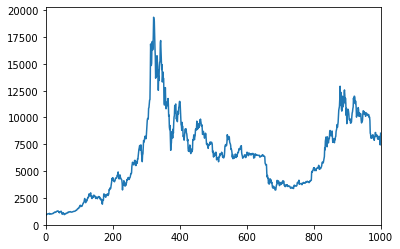

In [13]:
# can see this plotting
btcdf['close'].plot()
plt.show()

In [12]:
btcdf.tail(10)
# from here you can do further analysis for your data that you have just scraped.

,close,conversionSymbol,conversionType,high,low,open,time,volumefrom,volumeto
991,8014.39,,direct,8193.41,7945.77,8173.48,1571184000,34102.92,2.746703e+08
992,8082.46,,direct,8145.50,7948.95,8014.39,1571270400,21657.02,1.751729e+08
993,7972.62,,direct,8157.36,7850.66,8082.46,1571356800,27732.54,2.210659e+08
994,7973.63,,direct,8108.69,7919.05,7972.62,1571443200,17875.39,1.432024e+08
995,8247.25,,direct,8326.13,7911.49,7973.63,1571529600,25287.68,2.053943e+08
996,8223.25,,direct,8359.52,8177.11,8247.25,1571616000,22831.65,1.885115e+08
997,8034.50,,direct,8318.41,8021.36,8223.25,1571702400,24453.79,2.005939e+08
998,7479.54,,direct,8071.80,7336.06,8034.50,1571788800,60122.39,4.576725e+08
999,7444.20,,direct,7524.31,7370.13,7479.54,1571875200,28580.18,2.136631e+08
1000,8530.63,,direct,8574.88,7431.20,7444.20,1571961600,48336.70,3.854373e+08


In [14]:
#also you can plot continouos live graph with frequently loading live data -- 

In [ ]:
# stable internet connection and enough access permission is required to have
# thank you, see you on next notebook